# EC3389 - Assignment 4 - James LeDoux #

In [28]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline    

In [29]:
def generate_data(n_obs):
    X = np.random.uniform(-5, 5, n_obs)
    Z = np.vander(X,4)
    X = np.matrix(X).T
    e = np.random.normal(0,2, n_obs)
    e = np.matrix(e).T
    B = np.matrix([[3],[4],[1],[2]])
    Y = Z.dot(B) + e
    return (X,Y,Z)

In [30]:
X,Y,Z = generate_data(10)

In [31]:
def ridge_coefficients(Z, p, Y):
    I = np.identity(len(Z[0]))   
    A = np.linalg.inv(np.dot(Z.T, Z) + p*I) 
    B = np.dot(Z.T, Y) 
    return np.dot(A,B)

In [38]:
X,Y,Z = generate_data(10)
ridge_coefficients(Z, 0, Y)

matrix([[ 2.98039977],
        [ 3.91408624],
        [ 0.94729584],
        [ 1.78695929]])

In [39]:
def monte_carlo_ridge(n_obs, n_iter, p):
    #X,Y,X = generate_data
    betahat_matrix = np.zeros((n_iter, 4))
    for i in range(len(betahat_matrix)):
        X,Y,Z = generate_data(n_obs)
        betahats = ridge_coefficients(Z,p,Y)
        #betahat_matrix[i] = betahats
        for j in range(4):
            betahat_matrix[i][j] = betahats[j]
    return betahat_matrix

In [40]:
vals = monte_carlo_ridge(10, 4, 1.5)
vals

array([[ 2.97081927,  4.05546154,  1.13701902,  0.65579838],
       [ 2.4387139 ,  2.32671936,  3.03596004,  1.92118448],
       [ 3.02639508,  3.93853032,  0.42944333,  1.15187835],
       [ 3.00538632,  4.02404611,  0.77944528,  1.43411221]])

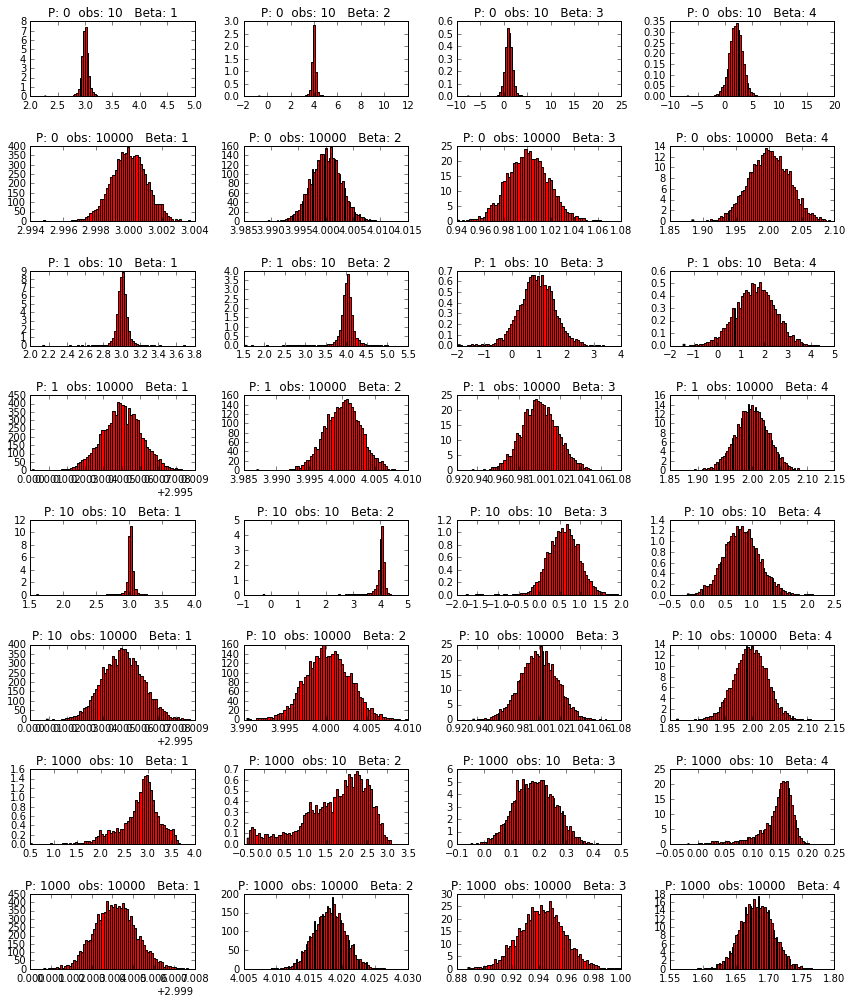

In [42]:
#plot all poss combinations of p(0,1,10,1000) and n obs(10, 10000) w/ 5000 simulations 
fig, ax = plt.subplots(8,4, figsize = (12,14))
pvals = [0,1,10,1000]
nvals = [10, 10000]

i = 0
j = 0

for p in pvals:
    for nobs in nvals:
        betahats = monte_carlo_ridge(nobs, 5000, p)
        
        #for each of the four columns of the betahat matrix:
        for value in range(len(betahats[0])):
            vals = [item[value] for item in betahats]
            ax[i,j].hist(vals, bins=70, normed = 1, color="red")
            ax[i,j].set_title("P: " + str(p) + "  obs: " + str(nobs) + "   Beta: " + str(value+1))


            if j < 3:
                j = j + 1
            else:
                i = i + 1
                j = 0
            #print(str(i) + " " + str(j))   
plt.tight_layout()
         

As P increases, the mean of the beta distributions goes toward zero, and the variances increase. As n increases, the distributions become more normal, with mean centering around the true betas' values and variance goes to a constant sigma. Increasing p increases the bias of the model, since p is the model's shrinkage coefficient. This effect is more pronounced for smaller values of n. The variance of the model is decreasing as the bias is increasing because the rising p is causing the coefficients to shrink toward zero, causing a smoother, more generalized model with lower variance.